## 0. Code Setup and Helper Functions

### 0.1 Import all necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
from top2vec import Top2Vec
import sys

2022-07-19 22:50:29.158690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 22:50:29.158713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 0.2 Path Adjustments

In [2]:
assert os.path.exists('../src'), f"[ERROR] The path src not detected in the parent directory '{os.getcwd()}'."

if os.getcwd().endswith('/notebooks'):
    os.chdir('..')
    sys.path.append('./src')

print(f'[INFO] Current Directory: "{os.getcwd()}".')

[INFO] Current Directory: "/home/iceking/Desktop/22SS-TUM Lecture Docs/3. Praktikum (IN2106, IN4249)/Repo/topic-modeling-advancements".


## 1. Train

In [66]:
configs = {
    'dataset': '20news',
    'preprocessing_funcs': [
        'to_lowercase',
        'standardize_accented_chars',
        'remove_url',
        'expand_contractions',
        'remove_mentions',
        'remove_hashtags',
        'remove_new_lines',
        'keep_only_alphabet',
        # 'remove_extra_spaces',
        'remove_english_stop_words',
        'lemmatize_noun'
    ],
    'algorithm': 'top2vec',
    'algorithm_args': {
        'num_topics': 20,
         'embedding_model': 'doc2vec',
        #'embedding_model': 'universal-sentence-encoder',
        # 'embedding_model': 'universal-sentence-encoder-large', # WORKS VERY WELL
        # 'embedding_model': 'distiluse-base-multilingual-cased',
        'doc2vec_speed': 'fast-learn',
        'min_count': 50,
        'umap_args': {
            'n_neighbors': 15,
            'n_components': 5,
            'metric': 'cosine',
            'random_state': 42  # Try to always include this for reproducibility, github.com/ddangelov/Top2Vec/issues/86
        },
        'hdbscan_args': {
            'min_cluster_size': 15,
            'metric': 'euclidean',
            'cluster_selection_method': 'eom'
        }
    }
}


In [67]:
from src import preprocessor,top2vec_runner
from src.utils import load_documents

docs,labels = load_documents(dataset=configs['dataset'])
if 'preprocessing_funcs' in configs:
    docs = preprocessor.run(data=docs, prep_functions=configs['preprocessing_funcs'])
    
algorithm_args = configs['algorithm_args']
algorithm_args.update(data_name=configs['dataset'],docs=docs,labels=labels)

algorithm_name = configs['algorithm'].lower()
if algorithm_name == 'top2vec':
    from src import top2vec_runner
    model, df_output_doc_topic, df_output_topic_word = top2vec_runner.parametric_run(args=algorithm_args)

[INFO] Available Preprocessing Functions in the Module:['to_lowercase', 'standardize_accented_chars', 'remove_url', 'expand_missing_delimiter', 'remove_mentions', 'remove_hashtags', 'keep_only_alphabet', 'remove_new_lines', 'remove_extra_spaces', 'remove_html_tags', 'expand_contractions', 'remove_english_stop_words', 'lemmatize', 'lemmatize_verb', 'lemmatize_noun', 'lemmatize_adjective', 'correct_typo']
[INFO] Preprocessing starting..
[INFO] These string preprocessing methods will be applied to the data in order:
(  'to_lowercase',
   'standardize_accented_chars',
   'remove_url',
   'remove_mentions',
   'remove_hashtags',
   'remove_new_lines',
   'keep_only_alphabet')
[INFO] Then, these tokenized preprocessing methods will be applied to the data in order:
(  '__tokenize',
   'expand_contractions',
   'remove_english_stop_words',
   'lemmatize_noun',
   '__glue')


2022-07-19 23:22:04,436 - top2vec - INFO - Pre-processing documents for training
2022-07-19 23:22:04,436 INFO:Pre-processing documents for training


[INFO] Preprocessing completed in 11.425 seconds..
[INFO] Top2Vec Parameters:
{
    "num_topics": 20,
    "embedding_model": "doc2vec",
    "doc2vec_speed": "fast-learn",
    "min_count": 50,
    "umap_args": {
        "n_neighbors": 15,
        "n_components": 5,
        "metric": "cosine",
        "random_state": 42
    },
    "hdbscan_args": {
        "min_cluster_size": 15,
        "metric": "euclidean",
        "cluster_selection_method": "eom"
    },
    "data_name": "20news"
}
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-large" found, so no need to download.
[INFO] The embedding model folder:"./pretrained_models/universal-sentence-encoder-multilingual-large" found, so no need to download.
[INFO] Top2Vec is

2022-07-19 23:22:09,726 - top2vec - INFO - Creating joint document/word embedding
2022-07-19 23:22:09,726 INFO:Creating joint document/word embedding
2022-07-19 23:25:59,207 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-19 23:25:59,207 INFO:Creating lower dimension embedding of documents
2022-07-19 23:26:14,079 - top2vec - INFO - Finding dense areas of documents
2022-07-19 23:26:14,079 INFO:Finding dense areas of documents
2022-07-19 23:26:15,686 - top2vec - INFO - Finding topics
2022-07-19 23:26:15,686 INFO:Finding topics


[INFO] Original (Non-reduced) Number of Topics: 197.
[INFO] Topic #00:
     > From Reduced Model:True.
     > Topic Size:2482.
     > Topic Words: ['lhz' 'ghj' 'nuy' 'rck' 'nrhj' 'qax' 'ax' 'fpl' 'scx' 'kjz' 'vz' 'wwiz'
		 'bhj' 'tct' 'uj' 'bxn' 'giz' 'bhjn' 'rlk' 'ahf' 'yx' 'chz' 'ei' 'fq'
		 'vmk' 'okz' 'uz' 'gy' 'zd' 'qy' 'ki' 'mq' 'gcx' 'wsh' 'uo' 'qtm' 'fij'
		 'hfd' 'mj' 'nyi' 'qq' 'qw' 'lg' 'nyr' 'kn' 'uww' 'wt' 'qr' 'wpg' 'gq']
     > Topic Word Scores: [0.51043266 0.50763506 0.50696015 0.5004246  0.4982492  0.4964734
		 0.49576768 0.4935965  0.49326032 0.49051392 0.48662457 0.48579094
		 0.48539224 0.4837031  0.4782354  0.47749233 0.4767971  0.47666645
		 0.47611776 0.47361395 0.47271135 0.472015   0.46291208 0.4623267
		 0.46213526 0.45904106 0.45827383 0.45786974 0.45728242 0.45164385
		 0.44875595 0.44793677 0.44424522 0.44262904 0.44081625 0.43674475
		 0.4360687  0.432141   0.4305772  0.42840275 0.42327127 0.4229751
		 0.4189725  0.41737124 0.41641033 0.41368002 0.4134102

## 2. Print Outputs

In [68]:
df_output_doc_topic

,run_id,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
5303,1658265724,0,kmr keith ryan subject islam scientific predic...,alt.atheism,3,0.540358
5355,1658265724,1,organization penn state university john johnso...,alt.atheism,3,0.528709
5616,1658265724,2,simon simon clippingdale subject islamic autho...,alt.atheism,3,0.485451
9041,1658265724,3,ednclark jeffrey clark subject thought keyword...,alt.atheism,6,0.344322
3292,1658265724,4,nanci ann miller nm w subject book organizatio...,alt.atheism,1,0.467663
...,...,...,...,...,...,...
5934,1658265724,18841,emarsh eric marsh subject magick parallel univ...,talk.religion.misc,3,0.421462
11509,1658265724,18842,system kalki dasa subject bhagavad gita organi...,talk.religion.misc,9,0.429462
3506,1658265724,18843,clavazzi doge subject learned waco wacko keywo...,talk.religion.misc,1,0.423616
8323,1658265724,18844,hudson paul hudson jr subject clarification pe...,talk.religion.misc,6,0.567373


In [69]:
with pd.option_context('display.max_colwidth', 100):
    display(df_output_topic_word)

,run_id,method,method_specific_params,dataset,num_given_topics,reduced,topic_num,topic_size,topic_words,word_scores,num_detected_topics,num_final_topics,duration_secs
0,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,0,2482,"[lhz, ghj, nuy, rck, nrhj, qax, ax, fpl, scx, kjz, vz, wwiz, bhj, tct, uj, bxn, giz, bhjn, rlk, ...","[0.51043266, 0.50763506, 0.50696015, 0.5004246, 0.4982492, 0.4964734, 0.49576768, 0.4935965, 0.4...",197,20,259.369
1,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,1,1230,"[nrhj, nuy, qax, adirondack, ghj, lhz, breton, wwiz, scx, giz, ax, utica, moncton, fpl, liefeld,...","[0.47284922, 0.47016042, 0.4630687, 0.4630158, 0.4613129, 0.45357877, 0.45251778, 0.45108816, 0....",197,20,259.369
2,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,2,1223,"[openwin, xdm, fprintf, openwindows, stderr, olwm, libxmu, oname, ndet, xterm, lib, louray, xsun...","[0.4401405, 0.43338072, 0.42375582, 0.41702667, 0.41656822, 0.4139195, 0.41234863, 0.40717262, 0...",197,20,259.369
3,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,3,1155,"[atheist, theist, morality, atheism, dwyer, livesey, moral, mozumder, bobbe, agnostic, beauchain...","[0.47137868, 0.46316522, 0.45797732, 0.43074477, 0.42914614, 0.40588623, 0.40124255, 0.40106812,...",197,20,259.369
4,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,4,1091,"[prb, orbit, nrhj, ghj, spacecraft, solar, nuy, flyby, scx, bhjn, wwiz, orbiter, zoology, utzoo,...","[0.45136955, 0.42843515, 0.42055452, 0.41953528, 0.4194555, 0.41701874, 0.4159594, 0.40624434, 0...",197,20,259.369
5,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,5,973,"[xlib, widget, pixmap, application, colormap, stderr, toolkit, ndet, fprintf, intrinsics, rectan...","[0.46174762, 0.45208278, 0.43752223, 0.43156534, 0.43027705, 0.42849645, 0.4229794, 0.42239833, ...",197,20,259.369
6,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,6,929,"[christ, scripture, psalm, jesus, verse, apostle, isaiah, god, elohim, testament, unto, church, ...","[0.50835407, 0.4962113, 0.48947096, 0.4827124, 0.47579414, 0.4751661, 0.46719953, 0.4647577, 0.4...",197,20,259.369
7,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,7,879,"[penev, nubus, mhz, lciii, powerpc, vlb, simm, simms, vram, qax, eisa, coprocessor, ghj, quadra,...","[0.41373238, 0.41167837, 0.40854532, 0.40310225, 0.39947307, 0.39746878, 0.39485043, 0.3918784, ...",197,20,259.369
8,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,8,827,"[bruin, playoff, islander, penguin, overtime, shanahan, domi, mogilny, potvin, powerplay, yzerma...","[0.50907093, 0.49952072, 0.49148518, 0.4850794, 0.48473194, 0.4765441, 0.47633365, 0.47579694, 0...",197,20,259.369
9,1658265724,top2vec,"{'doc2vec_speed': 'fast-learn', 'min_count': 50, 'embedding_model': 'doc2vec', 'umap_args': {'n_...",20news,20,True,9,826,"[scx, amp, ghj, nrhj, lhz, fpl, rck, qax, amplifier, nuy, radio, circuit, tct, wwiz, bhjn, playe...","[0.44008216, 0.43680796, 0.42768678, 0.42347717, 0.4213911, 0.4205706, 0.4205653, 0.41845486, 0....",197,20,259.369


In [70]:
# First Documents
for i in sorted(df_output_topic_word['topic_num'].to_list()):
    x = df_output_doc_topic.query(f'`Assigned Topic Num` == {i}').sort_values(by ='Assignment Score',ascending=False).drop('run_id',axis=1).head()
    with pd.option_context('display.max_colwidth', None):
        display(x)

,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
0,12508,goofy david haag subject test reply goofy david haag organization unlv computer science electrical engineering line test see work,sci.electronics,0,0.836195
1,6862,markm mark monninger subject haggle deal save nntp posting host reply rapw organization sps distribution usa line sure advantage mark,rec.autos,0,0.821556
2,3894,abravo andrew bravo subject asynch synch mac nntp posting host mondrian csufresno edu organization california state university fresno line anyone good code drive serial port syncronos mode really need bad tia abravo,comp.sys.mac.hardware,0,0.820550
3,14401,binglis binglis subject test please ignore organization university florida line distribution world reply binglis nntp posting host ufnmr health ufl edu,sci.space,0,0.818191
4,9927,arsenaul arsenault michel subject looking boxscores organization universite de montreal distribution na line looking boxscores nhl team personal research someone help michel arsenault,rec.sport.hockey,0,0.807468


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
2482,10383,subject ncaa final winner ktgeiss organization miami university academic computer service line lake state maine final please post,rec.sport.hockey,1,0.786181
2483,9826,subject college hockey star roster bdhissong organization miami university academic computer service line could someone please post roster college hockey star game east west roster thanks advance,rec.sport.hockey,1,0.763625
2484,5788,unpingco jose unpingco subject sale ultrabots pc game keywords ultrabots video game pc game line electronics art ultrabots game sale book original disk original box best offer contact unpingco,misc.forsale,1,0.748904
2485,9569,amacal ariel subject yankee schedule organization smcar fsm w line nntp posting host eris someone net post yankee schedule need right away thank,rec.sport.baseball,1,0.747832
2486,10537,organization central michigan university martin hill gfkkh subject college hockey star game line anybody know detail shriners star game featured best senior college hockey game orono maine please reply,rec.sport.hockey,1,0.746060


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
3712,2325,christian robert subject window exit problem organization university neuchatel switzerland line hello problem window program sometimes save setting program manager system corrupt one grp file progman exe open next start thanks answer chrobert,comp.os.ms-windows.misc,2,0.710115
3713,2750,herrod stephen herrod subject mewin latex help organization computer science department stanford university line posted apps group get response try trying use latex help feature available emacs window read need separate latexhlp zip file along vms hlp zip file convert window help anyone found file gotten command help work thanks steve herrod,comp.os.ms-windows.misc,2,0.708497
3714,2657,gloege andreas gloege subject ottomenu get originator gloege organization technische universitaet muenchen germany line heard ottomenu good desktop window anybody tell get cica pub pc win util also wustl simtel great number site post mail andreas gloege kazmaierstr bei klarmann muenchen email gloege,comp.os.ms-windows.misc,2,0.703391
3715,2007,drewster subject utility updating win ini system ini reply organization university chicago computing organization line article apr sp svein pedersen writes nead utility updating deleting adding changing ini file window find ftp host svein unless completely misunderstanding try using either notepad sysedit exe found system subdirectory edit ini file sysedit exe program cool automatically open win ini system ini autoexec bat config sys file edited drewster,comp.os.ms-windows.misc,2,0.702238
3716,2752,louray michael panayiotakis subject hot key screen saver organization george washington university line well renaming screensavers scr exe running pposted tried changing win ini effect show setup dialog box butdoesn enable saver mickey,comp.os.ms-windows.misc,2,0.702004


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
4935,18356,asiivo antti siivonen subject part part homosexuality organization university joensuu line long time see andreas andreas siperian sirri siberian stint itu love evolution tuusniemi siis imein suut,talk.religion.misc,3,0.780428
4936,412,benedikt rosenau subject amusing atheist agnostic organization technical university braunschweig germany line article r jcinnt g cfaehl chris faehl writes correction hard atheism faith yes faith like weak atheism benedikt,alt.atheism,3,0.738304
4937,15166,jcj jcj subject people become atheist organization huh whuzzat line article may muirm maxwell c muir writes think give amatuer psysochology candor would happy proven wrong problem proven wrong sound broken absolutely went journey lukewarm christianity agnosticism atheism agnosticism although know faith le christianity think path many u take jeff johnson jcj,soc.religion.christian,3,0.731819
4938,482,kax kevin anthoney subject christian morality organization nottingham university line article dp writes fact god could believe anything want think minute would rather someone love made love wanted love difference believing existence entity loving entity god could show directly exists still free choice whether love kevin anthoney kax believe anything read sig file,alt.atheism,3,0.719103
4939,18539,mathew mathew subject year say christian morality organization mantis consultant cambridge uk line x newsreader rusnews v frank frank dwyer writes b neither christian theist believe objective morality preference relativist soup gobbledegook well two approach take one ask objective morality assuming secret ask think wrong relativism correct misconception mathew,talk.religion.misc,3,0.711927


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
6090,5504,gtkurdy godtom subject drop organization tommyvision corporation washington dc usa line nntp posting host access digex net,comp.windows.x,4,0.739356
6091,14355,lcm luciana c messina subject hst servicing mission scheduled day organization loral software productivity laboratory line another factor bringing hst back earth risk contamination luciana c messina lcm,sci.space,4,0.728744
6092,14138,zellner subject hst servicing mission line organization space telescope science institute distribution na article rrhlo ajb prb pat writes space walking going boost hst orbit think right sitting mile would like idea come news ben,sci.space,4,0.722927
6093,14332,prb pat subject combo propulsion system organization express access online communication usa line nntp posting host access digex net difficult would solar sail mission say mercury much km delta v eat could solar sail handle say adiscovery bus drop mercury orbit good enough rocket put form polar orbit pat,sci.space,4,0.714061
6094,14261,nsmca subject combo propulsion system line nntp posting host acad alaska edu organization university alaska fairbanks hard easy would combo mission solar sail way outer planet near orbit use normal mean seems everyone talk using one system one system per mission one propulsion system miss something die committee michael adam nsmca high jacked,sci.space,4,0.698797


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
7181,4783,mufti saad mufti subject tool convert gif file xpm pixmap format organization personal library software inc rockville md line need tool described subject line tool available via ftp appreciate someone could e mail location pathname thanks saad mufti personal library software e mail mufti,comp.windows.x,5,0.727401
7182,5162,rgb rudy bonefas subject need x win popup menu package reply rgb organization roadnet technology inc line rather write anyone direct package let create cascaded popup menu x window reason portability package rely x toolkit xlib xt intrinsics something written c would nice thanks,comp.windows.x,5,0.723013
7183,5114,usun sonnie subject x bitmap postscript line hey folk course develope x window application encountered problem could transform x window bitmap postscript file library routine source code call job thank advance p email reply please seldom read newsgroup,comp.windows.x,5,0.713496
7184,5684,mufti subject including color pixmap xpm file application organization personal library software inc line portable convenient way use color picture file xpm format define x pixmap motif application function pointer tip etc would welcome saad mufti personal library software e mail mufti,comp.windows.x,5,0.703677
7185,5332,adrian adrian nye subject xwininfo organization reilly associate inc line reply adrian nntp posting host enterpoop mit edu xpert want equivalent xwininfo name via call set call xlib need map window name id probably easy programming x little x source code simply look mit client xwininfo xwininfo c find exactly adrian nye reilly associate,comp.windows.x,5,0.703511


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
8154,15212,petch chuck subject daily verse line keep perfect peace whose mind steadfast trust isaiah,soc.religion.christian,6,0.765451
8155,15472,petch chuck subject daily verse line god peace soon crush satan foot grace lord jesus roman,soc.religion.christian,6,0.745903
8156,514,mangoe charley wingate subject say apostle tortured line tradition church hold apostle meaning surviving disciple matthias barnabas paul martyred except john tradition understood read early church writing bible heteroorthodox scripture c wingate peace god peace strife closed sod mangoe yet brother pray one thing to have mangoe marv lous peace god,alt.atheism,6,0.738324
8157,14821,petch chuck subject daily verse line receive power holy spirit come witness jerusalem judea samaria end earth act,soc.religion.christian,6,0.730984
8158,15313,petch chuck subject daily verse line purified obeying truth sincere love brother love one another deeply heart ipeter,soc.religion.christian,6,0.716999


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
9083,4625,paryavi saiid paryavi subject centris mhz mhz organization kansa state university line nntp posting host matt ksu ksu edu summary possible keywords centris put mhz cpu centris math coprocessor possible speed centris run either mhz mhz see oscillator motherboard like one iisi motherboard oscillator centris idea thanks saiid paryavi paryavi saiid,comp.sys.mac.hardware,7,0.779861
9084,1713,wbdst william b dwinnell subject vesa graphic standard organization university pittsburgh line ibm pc world much standard vesa become svga graphic know lot graphic board company well several graphic chip manufacturer adhering vesa standard effect vesa local bus anyone,comp.graphics,7,0.749129
9085,6259,coutsoft michael coutsoftides subject dx mhz motherboard sale organization occidental college los angeles ca usa line hate post dx mhz mb w meg n ram make offer michael,misc.forsale,7,0.748102
9086,1525,rjs c robert synoski subject bit graphic card nntp posting host parsec reply rjs c organization paradyne largo florida line looking eisa vesa local bus graphic card support least x x resolution know matrox one expensive card know support resoultion striaght isa also x server unix pc support bit thanks,comp.graphics,7,0.738570
9087,2181,mlin ming lin subject x video board keywords ati window reply mlin distribution usa organization workgroup computing division pdx intel line hi plan upgrading monitor video card x dx isa local bus system would appreciate anyone drop email experience high resolution video board monitor thanks ming lin mlin,comp.os.ms-windows.misc,7,0.736860


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
9962,10234,subject binghampton ranger playoff game kwolfer organization wesleyan university nntp posting host willet wesleyan edu line anyone know message televise binghampton ranger playoff game even taped replay would nice,rec.sport.hockey,8,0.784542
9963,9833,golchowy gerald olchowy subject bruin organization university toronto chemistry department line article apr lmcmasc writes could anyone post game summary sabre bruin game grant fuhr rule gerald,rec.sport.hockey,8,0.762784
9964,10426,golchowy gerald olchowy subject devil islander tiebreaker organization university toronto chemistry department line article c lfa e cal craig allen lorie writes according hockey guru espn islander win tonite two team record devil playing penguin islander season series devil think rule deciding tie breaker include season series goal goal order correct wrong anyone anything add thought win goal gerald,rec.sport.hockey,8,0.757837
9965,10266,rzuback subject leaf v wing summary rob shick suck organization external relation lakehead university line agree rob shick suck big time thing last night game boston buffalo,rec.sport.hockey,8,0.749237
9966,10464,cal craig allen lorie subject thumb espn organization university virginia line everyone bitching hockey coverage espn almost like detroit toronto game televised last nite thankful see hockey night supposed carried thanks espn matter televised game craig,rec.sport.hockey,8,0.747557


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
10789,12333,tron tron r subject modulation rf organization university illinois urbana line would like modulate khz squarewave rf rf remote control project squarewave high v low v thanks tron,sci.electronics,9,0.753609
10790,6016,thssjxy smile subject forsale used guitar amp article iitmax apr distribution usa organization illinois institute technology line two year old crate guitar amplifier model g xl handle upto watt dual input two channel reverb three band eq distortion asking send mail thssjxy interested price maybe negotiable,misc.forsale,9,0.747581
10791,12583,jmichael subject radar detector detector article almaden line detect oscillator operating detector saw story use canada go putting oscillator car,sci.electronics,9,0.724609
10792,12059,msf michael fulbright subject analog switch balanced demodulator distribution na organization university arizona unix user group line caadams kenny adam writes hi instead using vdc supply try using volt supply commercial audio equipment us approach ground referenced audio use volt supply logic ground case would switch control voltage v turn switch v turn switch michael fulbright msf,sci.electronics,9,0.718743
10793,12099,wb omc duane p mantick subject ir remote control receiver organization purdue university engineering computer network line ritterbus writes want buy one try radio shack else tv repair shop probably order one by the way carrier frequency khz different tv vcr cable box stereo manufacturer us unique pulse scheme perform different function equipment tv including rca set home us simple carrier think run khz tone decoding one piss thing hook irled variable oscillator tune wreaks kind havoc similarly vcr remote change channel cable box always seems change cable box channel pause play soooo thing overlap duane,sci.electronics,9,0.713870


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
11615,17132,cvrkatz eran katz subject zionism racism organization technion israel institute technology line yes want read article,talk.politics.mideast,10,0.737545
11616,358,jaeger gregg jaeger subject yet rushdie islamic law organization boston university physic department line article qi l jkj livesey jon livesey writes hope islamic bank something bcci ripped many small depositor among muslim community uk elsewhere jon grow childish propagandist gregg,alt.atheism,10,0.686778
11617,1611,kardank kardan kaveh subject newsgroup split organization universite de montreal line following thread appologies already mentioned comp graphic kaveh kardan kardank,comp.graphics,10,0.686658
11618,116,mathew mathew subject gulf war peace niks organization mantis consultant cambridge uk x newsreader rusnews v line mccullou mark mccullough writes seem agreeing soldier job best could following order proof positive people beyond satire mathew,alt.atheism,10,0.679315
11619,17422,rj get thee nunnery subject volume organization university virginia line face mr beyer outmatched u israeli intellectual attempt defend deceitful undeserving palestinian prove fruitless,talk.politics.mideast,10,0.675227


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
12431,8373,mjs mike sixsmith subject wanted advice new cylist organization university east anglia line angel levine writes exactly dangerous look anyone particular mind jody,rec.motorcycles,11,0.734562
12432,8364,mjs mike sixsmith subject xxxx mean police officer read stuff organization university east anglia line bgardner blaine gardner writes introducing new polysyllabic word strabismic example polysyllabic polysyllabic,rec.motorcycles,11,0.730169
12433,8493,mjs mike sixsmith subject good reason wave organization university east anglia line jlevine angel levine writes anyone driving cage ever waved bikers get urge never actually done driven cage bike park thinking riding bike,rec.motorcycles,11,0.710113
12434,8344,jlevine jody levine subject bike big dog organization ontario hydro research division line article apr bclarke writes article apr wendel writes anyone ever heard rider giving big dog great dane ride back bike dog would love could ever make work post month actually seen rider carting around pet dog sidecar great dane back though sound bit hairy yeah sure lab would love ride type stick head car window think would enjoy bungee corded gas tank lb squirming beast bit much backpack ok done bike like jody levine dod kv got pf jody p levine ride toronto ontario canada,rec.motorcycles,11,0.698548
12435,8585,csundh charles sundheim subject bike nntp posting host ursa organization calvin college line jlevine jody levine writes bike like jody levine dod kv got pf jody p levine ride toronto ontario canada know syd meant wrote line damn wrong newsgroup wrong newsgroup syd mean wrote line erc always curious dod,rec.motorcycles,11,0.689852


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
13244,11090,strnlght david sternlight subject open letter mr clinton organization dsi uscrpac line simple way convert clipper proposal unexceptionable one make voluntary get high quality secure nsa classified technology agree escrow key otherwise david david sternlight great care taken ensure accuracy information error omission excepted,sci.crypt,12,0.733806
13245,11459,strnlght david sternlight subject clipper chip technical summary organization dsi uscrpac line pat myrto say law enforcement want key let get court order ask use probably wiretapping warrant decrypt historical traffic prospective listening probably established pat approach would tip crook david david sternlight great care taken ensure accuracy information error omission excepted,sci.crypt,12,0.712465
13246,10844,strnlght david sternlight subject secret algorithm clipper chip crypto key escrow keywords encryption wiretap clipper key escrow mykotronx organization dsi uscrpac line article apr holland douglas craig holland writes let ask would trust richard nixon crypto key take mean president nixon private citizen nixon sure nothing would slightest interest president nixon david david sternlight great care taken ensure accuracy information error omission excepted,sci.crypt,12,0.707825
13247,11341,strnlght david sternlight subject would clipper make good cover encryption method organization dsi uscrpac line article apr kadie carl kadie writes think replacement clipper also think front end make sense government prohibits alternative non escrowed encryption scheme otherwise use front end without clipper david david sternlight great care taken ensure accuracy information error omission excepted,sci.crypt,12,0.703223
13248,11285,gtoal graham toal subject clipper considered harmful line dorothy denning read group someone group forwarding question like martin hellman anyone else seen detail chip course toasted often nsa patsy keeping head always mail directly denning denning denning g,sci.crypt,12,0.695116


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
14040,16234,f gautjw subject waco aflame organization stephen f austin state university line abolish cult start f b,talk.politics.guns,13,0.824894
14041,18152,ugxk girish kumtheker subject many beibg spent waco batf organization fannie mae distribution na line hi wonder much money spent waco batf paying batf messed made prestige issue girish girish kumthekar unix technical support e mail address ugxk,talk.politics.misc,13,0.757277
14042,18811,jmk joseph knapp subject biblical backing koresh tape cite enclosed organization line cotera writes david thibedeau sp one cult member said fire started one tank spraying tear gas facility knocked lantern sort mr leary tank theory moooo joe knapp jmk,talk.religion.misc,13,0.739987
14043,15620,paale paal ellingsen subject batf fbi murder almost everyone waco today organization university tromsoe line article r qsrinnc jim de arras writes mr roby government sucking heartless bastard human died yesterday human would died fbi taken action undeniable truth question long even fbi done nothing guess bd would committed suicide maybe hunger thirst gave choice sucide surrender bd warned beforehand fbi action chance surrender get fair trial matter started fire bd responsible peole dying one else paal ellingsen borgensvingen tlf paale kvaloeysletta data dobbelt arbeid til alle,talk.politics.guns,13,0.734488
14044,16072,meyers bill meyers subject ballad david koresh distribution usa organization n line article c w np pwithere patricia anne withered writes ballad david koresh concord waco tyrant minion failed though died fire koresh people prevailed good irony waco finale april patriot day day year earlier militia concord mass nearby town repelled gun control raid current colonial government,talk.politics.guns,13,0.730406


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
14802,7534,organization penn state university lrr subject dent car line turn police like would accident get report send insurance company contact guy insurance company pay would accident caused thus need go court friend mine got money work,rec.autos,14,0.708905
14803,7620,mobasser bijan mobasseri subject renting alamo organization villanova university line friend rented car last year turned needed lot insurance included base price hand rent alamo probability needing insurance unless accident need joe let see unless accident need hmmmmmmm bijan,rec.autos,14,0.679206
14804,6844,subject buy back libemc organization brigham young university line dealership today looking buying car salesman showing u something calling buy back car fleeted given back new model next year many mile good number type car generally good buy thanks ellen,rec.autos,14,0.672775
14805,7195,wrat wharfie subject fast organization unisql inc austin texas usa line article apr jnielsen john f nielsen writes may case speed limit sign necessary take away entirely yeah right away speed limit would mean huge tax increase municipality tried make revenue used gouge passing motorist,rec.autos,14,0.645129
14806,16102,dlo olsondl subject pill deer hunting line article apr jrm writes vast majority get life without ever use display firearm given society experience seems safer get rid many gun possible considering us include self defense hunting target shooting collecting buy notion vast majority people use display firearm let say contention true point get ting rid many gun possible used anyway david olson dlo well say put put know put put george stephanopolous,talk.politics.guns,14,0.634427


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
15561,5679,rpicas rui pica subject subscribe organization internet line nntp posting host enterpoop mit edu xpert please subscribe e mail rpicas,comp.windows.x,15,0.835528
15562,5307,rpicas rui pica subject subscribe organization internet line nntp posting host enterpoop mit edu xpert please subscribe e mail rpicas,comp.windows.x,15,0.828251
15563,4926,rpicas rui pica subject subscrive organization internet line nntp posting host enterpoop mit edu xpert please subscribe e mail rpicas,comp.windows.x,15,0.810607
15564,5058,skji ji soonki subject none organization internet line subscribe xpert skji,comp.windows.x,15,0.799803
15565,5446,grape mike grapevine subject subscribe organization internet line expert subscribe grape,comp.windows.x,15,0.790853


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
16297,13036,enea horace enea subject persistent v chronic organization apple computer line anyone tell difference persistent disease chronic one example persistent hepatitis v chronic hepatitis thanks horace,sci.med,16,0.759368
16298,13390,geb gordon bank subject vangus nerve vagus nerve article pitt reply geb gordon bank organization univ pittsburgh computer science line article bwb brian w barker writes mostly right connection vomiting fainting something vagus nerve stimulation vagus nerve slows heart drop blood pressure gordon bank n jxp skepticism chastity intellect geb shameful surrender soon,sci.med,16,0.748978
16299,13260,geb gordon bank subject need info rsd reply geb gordon bank organization univ pittsburgh computer science line article mar lrd writes started working rehabilitation hospital seen rsd come diagnosis several time exactly rsd nature faq subject really appreciate someone would mail reflex sympathetic dystrophy sure faq made least answer question last year gordon bank n jxp skepticism chastity intellect geb shameful surrender soon,sci.med,16,0.733313
16300,13489,geb gordon bank subject high prolactin reply geb gordon bank organization univ pittsburgh computer science line article jer jer john e rodway writes comment use drug parlodel high prolactin blood suppress secretion prolactin useful case galactorrhea adenoma pituitary secret much gordon bank n jxp skepticism chastity intellect geb shameful surrender soon,sci.med,16,0.719773
16301,12853,geb gordon bank subject brain abscess definition needed reply geb gordon bank organization univ pittsburgh computer science line article apr fresa writes could someone please define brain abscess relative one near cerebellum brain abscess infection deep brain substance hard cure antibiotic since get walled usually need surgical drainage gordon bank n jxp skepticism chastity intellect geb shameful surrender soon,sci.med,16,0.716004


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
16991,6104,pfc paul f cappucci subject seagate hard drive forsale organization genrad inc line nntp posting host jungle genrad com brand new never used seagate st x meg hard drive forsale paid includes mounting bracket bought ended buying new computer bro take,misc.forsale,17,0.821464
16992,5865,lohia raj lohia subject gb disk sale distribution usa organization apple computer inc cupertino ca line gb full size seagate scsi disk sale model st n brand new disk never used formatted send offer lohia raj,misc.forsale,17,0.804620
16993,6322,alin ailin lin subject mfm hd mb mb organization nyx public access unix denver math c dept line seagate st hh mb ibm fh mb mfm type good working condition buyer pay shipping ailin,misc.forsale,17,0.763054
16994,5713,vrr veenu r rashid subject sale meg esdi drive meg x dram organization distribution usa line sale st e seagate esdi drive meg unformatted without controller friend tested controller say work meg kx n dram please call email thanks veenu,misc.forsale,17,0.745241
16995,3659,organization arizona state university james cassidy ifjxc subject need spec western digital ide hd line friend mine need spec used hard drive got western digital ide meg cylinder head believe model number wd sure m model info would appreciated either somone know maybe western digitals phone number thanks,comp.sys.ibm.pc.hardware,17,0.731115


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
17650,6876,westes estes subject wanted toyota previa trac low mile organization mail group x newsreader tin version pl line looking buy toyota previa trac low mile selling one want someone buy existing lease please contact mail estes internet westes,rec.autos,18,0.708905
17651,7516,jkjec shazad barlas subject emergency brake opel nissan maximum keywords nissan organization university westminster line since subject brake anyone know wd vauxhall opel disengages drive rear wheel brake applied vauxhall boast car stable fwd mode braking wd mode shaz,rec.autos,18,0.682613
17652,6762,subject honda civic libemc organization brigham young university line like converse anyone purchased honda civic experience new car buying game would like know price expect pay sedan bargaining thanks advance ellen,rec.autos,18,0.678149
17653,7496,wrat wharfie subject sho clutch question grinding noise organization unisql inc austin texas usa line article c h f ldu jcyuhn james yuhn writes clutch hearing gearbox early shos lot referred gear rollover noise generally one first shos built mine make noise,rec.autos,18,0.675915
17654,7609,hhd horace dediu subject mbenz series vw passat organization gte laboratory waltham line go mercedes afford think wagon start around k although could k comparison car listed horace dediu gte laboratory sylvan road internet hdediu waltham,rec.autos,18,0.671373


,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
18291,9447,rudy rudy wade subject cub game april th article netcom rudyc igd organization home brave line article apr jclark j michael clark writes otis nixion lined single left two out breaking hitter cub win hitter jose guzman might take beat brave year look smoltz pitching line hit walk er loss,rec.sport.baseball,19,0.691051
18292,9294,luriem lurie liberalizer subject yankee fear organization allegheny college line tell youm one thing steve howe farr much better worst pitcher yankee pitching think talking post answer e mail use reply post answer e mailing meaqns post final result one particular horrid pitcher mind,rec.sport.baseball,19,0.686700
18293,9131,drm subject time best player organization new jersey institute technology line nntp posting host tesla overall career mattingly mattingly mattingly mattingly mattingly mattingly mattingly mattingly mattingly mattingly mattingly mattingly,rec.sport.baseball,19,0.666425
18294,9016,snichols sherri nichols subject brave pitching updatedir organization adobe system incorporated line article apr sbp writes second starter seems quality pitcher take mound team score le run team score run win put team better pitching advantage providing stop opposing team scoring run low scoring game would clearly benefit brave clear certainly rather team winning game game game luck going play much bigger role game sherri nichols snichols,rec.sport.baseball,19,0.665136
18295,8967,rap underdog subject southpaw organization university illinois urbana line anyone tell call left handed pitcher southpaw also story term originated thanks go cub prediction finish year without winning east,rec.sport.baseball,19,0.665131


## 3. Visualization

### Draw Topic Similarity Matrix

In [71]:
from src import visualizer

visualizer.visualize_heatmap(
    model=model,
    df_output_doc_topic=df_output_doc_topic,
    df_output_topic_word=df_output_topic_word,
    topics= None,
    top_n_topics = None,
    n_clusters = None, # Unknown for now
    width = 1000,
    height = 1000
)

### Draw Labels per Topic

In [115]:
from src import visualizer
visualizer.visualize_labels_per_topic(df_output_doc_topic=df_output_doc_topic,
                               df_output_topic_word=df_output_topic_word,top_n_labels=5)

### Draw 2D Document Vectors 

[INFO] UMAP Arguments for Visualization:{'n_neighbors': 15, 'n_components': 2, 'metric': 'cosine', 'random_state': 42}
[INFO] UMAP Model is being fitted..
[INFO] UMAP Model successfully fitted.


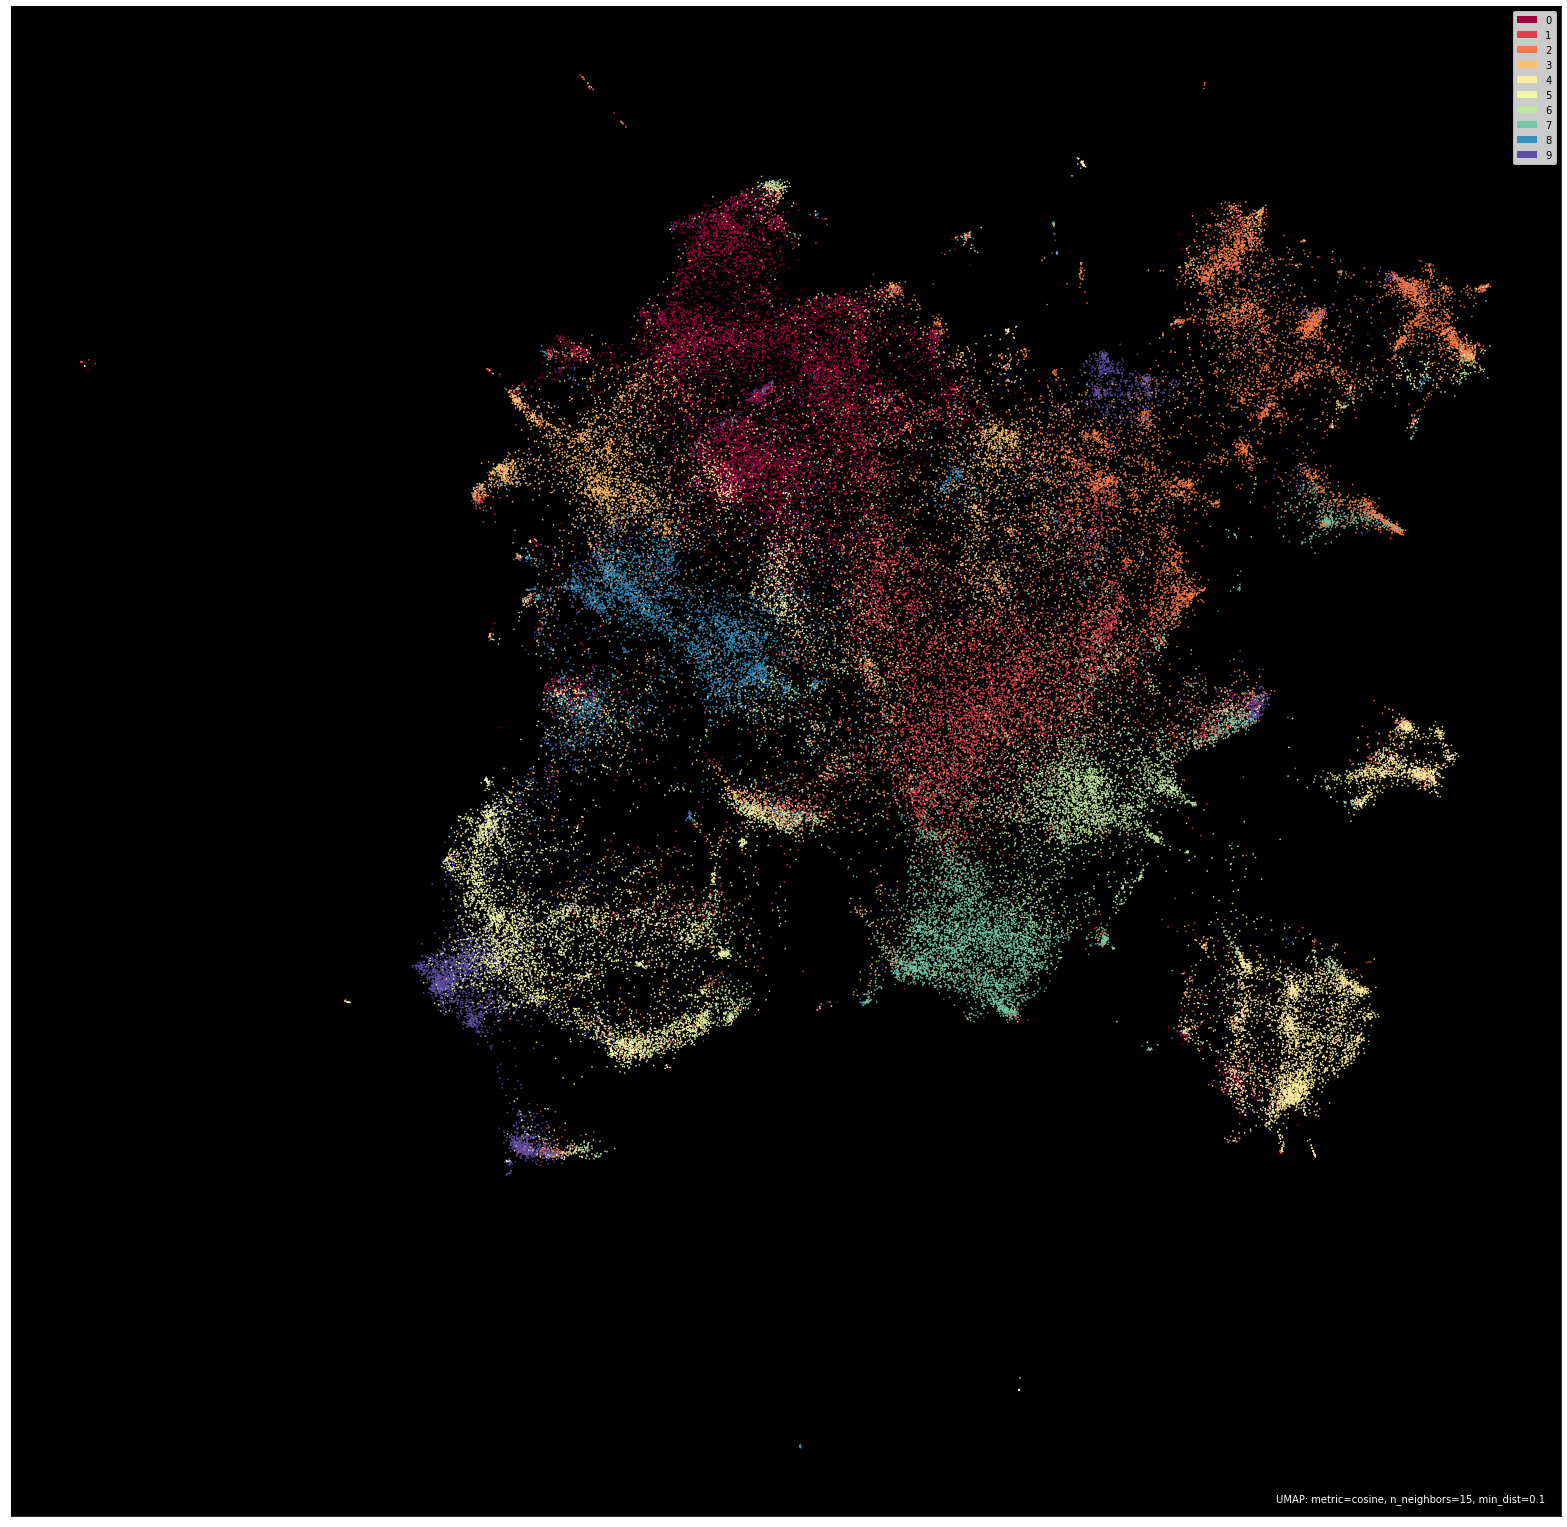

In [10]:
from src import visualizer

_ = visualizer.draw_umap2d_scatter_plot(model=model, df_output_topic_word=df_output_topic_word, target_dir= './output/visualization')

### Draw Topic Words Barchart

In [11]:
from src import visualizer

visualizer.visualize_barchart(df_output_topic_word=df_output_topic_word,n_words=5)

### Draw Representative Docs

In [12]:
from src.visualizer import draw_representative_docs
x = draw_representative_docs(df_output_doc_topic,top_n_docs=3)

import dataframe_image as dfi 
dfi.export(x,'./output/visualization/repr_docs_vis.png')
x

[0719/225452.687716:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0719/225452.701489:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0719/225452.914872:INFO:headless_shell.cc(660)] Written to file /tmp/tmpay2b7tul/temp.png.
[0719/225453.179919:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0719/225453.188753:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0719/225453.511741:INFO:headless_shell.cc(660)] Written to file /tmp/tmpmeoqcp9z/temp.png.


run_id,Document ID,Document,Real Label,Assigned Topic Num,Assignment Score
1658263842,25,national weather service issued flash flood watch region battered camp fire wednesday friday,caution_and_advice,0,0.529706
1658263842,33915,hurricane preparedness hour nfip flood insurance policy may cover loss avoidance measure like sandbag water pump protect insured property visit learn,other_relevant_information,0,0.576799
1658263842,33901,st lucie county public school closed notice due hurricane dorian what is open closed gt gt,other_relevant_information,0,0.439644
1658263842,31,wild animal fleeing fire please put bowl bucket water fill bird bath,caution_and_advice,1,0.317782
1658263842,56141,checking homeless especially drainage ditch many did not know coming they are shelter bound,rescue_volunteering_or_donation_effort,1,0.406580
1658263842,56095,today deliver food water amp cot people beaumont,rescue_volunteering_or_donation_effort,1,0.394415
1658263842,21,rt look like volcano erupted extreme devil wind may worsen fire,caution_and_advice,2,0.443729
1658263842,67160,meet frida labrador saved life looking mexico earthquake survivor,rescue_volunteering_or_donation_effort,2,0.490868
1658263842,67152,rt text ayudamexico help affected city,rescue_volunteering_or_donation_effort,2,0.451847
1658263842,3,almost million people flash flood watch northern california inch rain expected fall friday,caution_and_advice,3,0.523733


## Evaluation Part (Draft)

### Topic-Label Distribution

In [13]:
for i in range(len(df_output_topic_word)):
    print(f'Topic {i}:')
    print(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts())
    print('-'*32)

Topic 0:
caution_and_advice                        2456
other_relevant_information                2232
infrastructure_and_utility_damage         1965
displaced_people_and_evacuations          1734
sympathy_and_support                       967
rescue_volunteering_or_donation_effort     892
injured_or_dead_people                     738
not_humanitarian                           727
requests_or_urgent_needs                   126
missing_or_found_people                      7
Name: Real Label, dtype: int64
--------------------------------
Topic 1:
rescue_volunteering_or_donation_effort    4842
sympathy_and_support                      1123
requests_or_urgent_needs                  1073
other_relevant_information                1059
not_humanitarian                           648
caution_and_advice                         499
displaced_people_and_evacuations           445
infrastructure_and_utility_damage          161
injured_or_dead_people                      95
missing_or_found_people  

In [14]:
a = []
for i in range(len(df_output_topic_word)):
    a.append(f'Topic {i}:')
    a.append(str(df_output_doc_topic.query(f'`Assigned Topic Num` == {i}') ['Real Label'].value_counts()))
    a.append('-'*32)
a = '\n'.join(a)

In [15]:
def foo():
    for line in a.splitlines():
        if line != '-'*32:
            print(line)
        else:
            yield ''

### Diversity and Coherence

In [16]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [17]:
from src.utils import load_documents
documents,_ = load_documents('./data/20news_bydate','text')

TypeError: load_documents() takes 1 positional argument but 2 were given

In [ ]:
model_output = {"topics":df_output_topic_word['topic_words'].tolist()}
metric_diversity = TopicDiversity()
metric_coherence = Coherence(texts = [d.split(" ") for d in documents], measure = "c_v")
score_diversity = metric_diversity.score(model_output)
score_coherence = metric_coherence.score(model_output)
print(f'> score_diversity={"%.4f" % score_diversity},score_coherence={"%.4f" %score_coherence}')

In [ ]:
# -----------------------

In [ ]:


model_output = {"topics":[topic_stat['topic_words'] for topic_stat in topic_stats]}


for topk_val in range(1,30):
    metric_diversity = TopicDiversity(topk=topk_val)
    metric_coherence = Coherence(texts = [d.split(" ") for d in documents], topk = topk_val, measure = "c_v")
    score_diversity = metric_diversity.score(model_output)
    score_coherence = metric_coherence.score(model_output)
    print(f'> topk={topk_val},score_diversity={"%.2f" % score_diversity},score_coherence={"%.2f" %score_coherence}')